In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import dolfin

In [3]:
coefs = [
    (0,0),
    (1,0),
    (0,1),
    (1,1),
    (2,0),
    (0,2)
]

In [4]:
c = ' + '.join(["cos(2*pi*({}*x[0]+{}*x[1])) / {}".format(coefs[k][0], coefs[k][1], (k+1.)**2) for k in xrange(6)])
c_expr = dolfin.Expression(c)

mesh_size = 50
mesh = dolfin.UnitSquareMesh(mesh_size, mesh_size)
fn_space = dolfin.FunctionSpace(mesh, 'Lagrange', 1)

v = dolfin.TestFunction(fn_space)
u = dolfin.TrialFunction(fn_space)

a = -dolfin.inner(dolfin.nabla_grad(v), c_expr*dolfin.nabla_grad(u))
f = dolfin.inner(v, dolfin.Constant(0))

u_sol = dolfin.Function(fn_space)

def x2_on_left_bdy(x, on_bdy):
    return on_bdy and dolfin.near(x[1], 0.)

def x2_on_right_bdy(x, on_bdy):
    return on_bdy and dolfin.near(x[1], 1.)

bcs = [
    dolfin.DirichletBC(fn_space, dolfin.Expression('x[0]'), x2_on_left_bdy),
    dolfin.DirichletBC(fn_space, dolfin.Expression('1-x[0]'), x2_on_right_bdy)
]

# neumann conditions automatically satisfied since they are homogeneous

dolfin.solve(a*dolfin.dx == f*dolfin.dx, u_sol, bcs)

DEBUG:FFC:Reusing form from cache.
DEBUG:FFC:Reusing form from cache.
DEBUG:FFC:Reusing form from cache.


In [5]:
print c

cos(2*pi*(0*x[0]+0*x[1])) / 1.0 + cos(2*pi*(1*x[0]+0*x[1])) / 4.0 + cos(2*pi*(0*x[0]+1*x[1])) / 9.0 + cos(2*pi*(1*x[0]+1*x[1])) / 16.0 + cos(2*pi*(2*x[0]+0*x[1])) / 25.0 + cos(2*pi*(0*x[0]+2*x[1])) / 36.0


In [6]:
# for ipython notebook
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.tri as tri

def mesh2triang(mesh):
    xy = mesh.coordinates()
    return tri.Triangulation(xy[:, 0], xy[:, 1], mesh.cells())

def plot(obj):
    plt.gca().set_aspect('equal')
    if isinstance(obj, dolfin.Function):
        mesh = obj.function_space().mesh()
        if (mesh.geometry().dim() != 2):
            raise(AttributeError)
        if obj.vector().size() == mesh.num_cells():
            C = obj.vector().array()
            plt.tripcolor(mesh2triang(mesh), C)
        else:
            C = obj.compute_vertex_values(mesh)
            plt.tripcolor(mesh2triang(mesh), C, shading='gouraud')
    elif isinstance(obj, dolfin.Mesh):
        if (obj.geometry().dim() != 2):
            raise(AttributeError)
        plt.triplot(mesh2triang(obj), color='k')


<matplotlib.colorbar.Colorbar instance at 0x7f3d03b0d9e0>

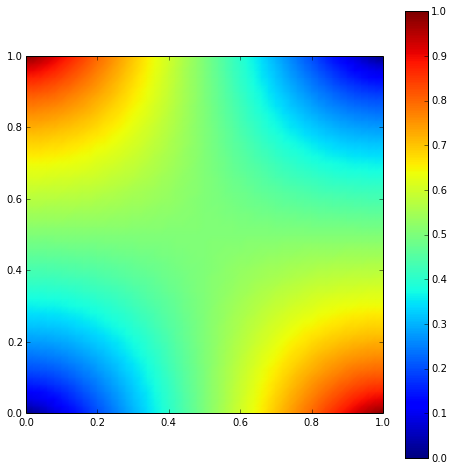

In [7]:
plt.figure(figsize=(8,8))
plot(u_sol)
plt.colorbar()

In [8]:
import numpy as np
X,Y = np.mgrid[0:1:6j, 0:1:6j]
x,y = X.ravel(), Y.ravel()

In [9]:
sol_points = np.vectorize(u_sol)(x,y)

In [10]:
np.savetxt('true_linear_elliptic.txt', np.c_[x,y,sol_points], header='x,y,u')